<a href="https://colab.research.google.com/github/liamedeiros/Newton2BlackHoles/blob/main/solutions/Measuring_the_Mass_of_Our_Sun_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring the Mass of Our Sun

This notebook primarily follows the Day 3 curriculum of ["From Newton to Black Holes"](https://www.dropbox.com/s/kbfx7bq4eukopuz/Lesson%20Plan_From%20Newton%20to%20Black%20Holes.pdf?dl=0), which was developed as part of the NSF funded project [Black Hole PIRE](https://bhpire.arizona.edu/).

Learning objectives for this notebook:
* Use online simulations to explore how planetary orbits depend on distance from the Sun and speed of the planet.

* Use data for our planetary system to measure the mass of the Sun

* Explore the stability of planetary systems

This notebook assumes that you have completed the "Introduction to basic programming and plotting" notebook.


Before we begin, please compile the cell below to load in the necessary libraries.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
# from matplotlib import rcParams
from matplotlib import rc
%matplotlib inline
!apt-get update
!apt install cm-super
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

In this section, we will explore the orbits of planets around a star and, in particular, the orbits of the planets around our Sun.
For our first exploration, we will use the following web-based app developed at the University of Colorado:

[https://phet.colorado.edu/en/simulation/gravity-and-orbits](https://phet.colorado.edu/en/simulation/gravity-and-orbits)

The figure below shows a screenshot from the app, and points out a few of its controls. With this app, you can watch a planet (say the Earth) orbit the central star (our Sun).

![Orbital Motion](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/Orbital_motion.png?raw=1)

You can:
* Change the distance of the planet from the star
* Change the initial velocity of the planet
* Change the mass of the star
* Change the mass of the planet.

Pause and reset the simulation. Turn on the “path”, and the “grid”. This exercise is easier if you use the “Model” version not the “To Scale” version but make sure to take a look at the “To Scale” version as well to get a sense of the distance between the Earth and the Sun.

1. **Place the Earth at about half of its actual distance from the Sun (one grid away from center of the Sun). Turn the simulation on. What happens to the Earth?**


Earth falls to the sun

2. **Reset the simulation and pause it again. Now place the Earth at about twice its actual distance from the Sun (four grids away from the center of the sun). Turn the simulation on. What happens to the Earth?**


Earth escapes from the Earth's gravitational well

3. **Reset the simulation and pause it again. Place the Earth at half the distance away from the Sun. You can change the velocity of the Earth by first turning on the “velocity” toggle and then dragging the vector around. Be careful to only change the length of the vector, not the direction (you can line it up with the grid). Try to change the velocity of the Earth until it makes a circle with a radius of about 1 grid spacing. Is this velocity greater than or smaller than the original velocity of the Earth?**

greater

4. **Now repeat your experiment at twice the distance. Try to change the velocity of the Earth until it makes a circle with a radius of about 4 grid spacings. Is this velocity greater than or smaller than the original velocity of the Earth?**


smaller

5. **Based on the above exercise, order the planets in our solar system based on their velocity (lowest velocity first).**

closer planets have higher velocity: Neptune, Uranus, Saturn, Jupiter, Mars, Earth, Venus, Mercury

### Kepler's 3rd Law

In our second exploration, we will use Kepler’s 3rd law and data for the planets in our Solar System.


**Kepler’s 3rd law** states that the cube of the distance between a planet and the Sun (the **orbital separation**) is proportional to the square of the time it takes the planet to complete one full orbit (the **orbital period**). In other words,

$a^3 = \left( \frac{GM}{4\pi^2}\right)T^2$

Here $a$ is the orbital separation of the planet, $T$ is the orbital period, $M$ is the mass of the Sun, and $G=6.67\times10^{-11}\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}$ is the gravitational constant.


If we express the orbital separation in Astronomical Units (AU; this is defined as the average distance between the Sun and the Earth, about 150 million km), the orbital period in Earth years (i.e., 365 days), and the mass of the Sun in octillions of metric tons (one octillion is equal to 1 billion billion billion or $10^{27}=1,000,000,000,000,000,000,000,000,000$  in scientific notation) and plug in the value for the gravitational constant, Kepler's 3rd law becomes

$\left(\frac{a}{\mathrm{AU}}\right)^3 = 0.5\left( \frac{M}{\mathrm{octillion \, ton}}\right)\left( \frac{T}{\mathrm{year}}\right)^2$

Note that for this exercise we will assume that all planets are in a circular orbit, a very good approximation.

Our first goal is to demonstrate that the planets in the Solar System obey this law. Our second goal is to use planetary data in order to measure the mass of the Sun.



6. **If you think of the last equation as a line of the form $y = m x + b$ with $y=a^3$, $x=T^2$, and $b=0$, what is the slope of the line equal to? (Hint, here we are looking for the answer in terms of variables).You can type your answers into a text cell or code cell, but it might be useful to work it out on a piece of paper.**

**Solution**

$0.5\left( \frac{M}{\mathrm{octillion \, ton}}\right)$

The table below shows the distances of the planets in our solar system from the Sun and their periods. The period is given in Earth years and the radius is given in AU.

Planet   | Period (T) [years] | orbital Separation (a) [AU]
---------|--------------------|------------------
Mercury  | 0.2410             | 0.39
Venus    | 0.6153             | 0.72
Earth    | 1.0                | 1.0
Mars     | 1.881              | 1.52
Jupiter  | 11.86              | 5.2
Saturn   | 29.43              | 9.54
Uranus   | 83.76              | 19.2
Neptune  | 163.7              | 30.1

7. **In the cell below define an array that will contain the period of the planets (```period```), and a second array that will contain the average separation between the sun and the planet (```separation```). Plot the separation along the $y$-axis and the period along the $x$-axis. Remember to add a grid and label your axes.**

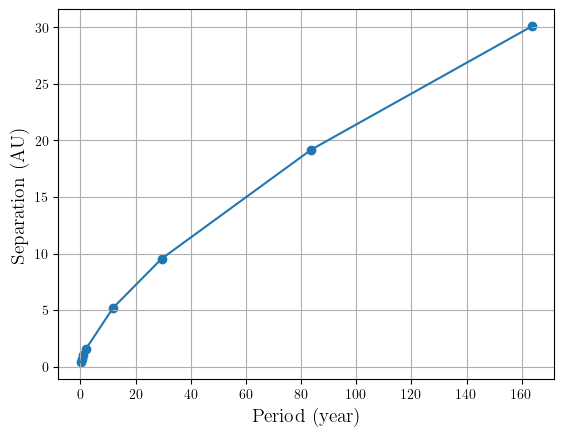

In [ ]:
# Solution!

period = np.array([0.2410, 0.6153, 1.0, 1.881, 11.86, 29.43, 83.76, 163.7])
separation = np.array([0.39, 0.72, 1.0, 1.52, 5.2, 9.54, 19.2, 30.1])

plt.plot(period, separation)
plt.scatter(period, separation)

plt.ylabel('Separation (AU)', fontsize=14)
plt.xlabel('Period (year)', fontsize=14)
plt.grid()





8. **Now define a new array that will contain the period squared (```period_squared```) and another new array that will contain the separation cubed (```separation_cubed```). Plot the period squared on the $x$-axis and the separation cubed along the $y$-axis. Remember to add a grid and label your axes.**

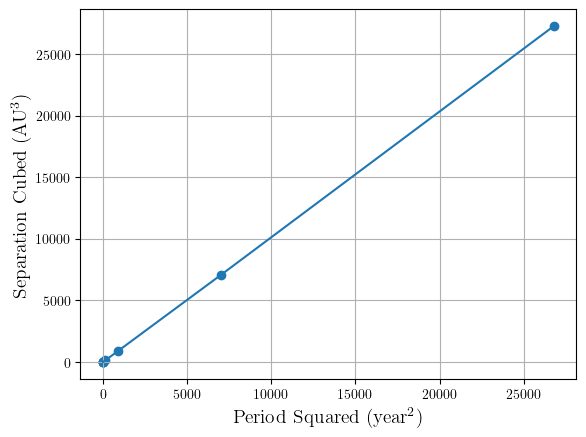

In [ ]:
# Solution!

period_squared = period*period
separation_cubed = separation*separation*separation

plt.plot(period_squared, separation_cubed)
plt.scatter(period_squared, separation_cubed)

plt.ylabel('Separation Cubed (AU$^3$)', fontsize=14)
plt.xlabel('Period Squared (year$^2$)', fontsize=14)
plt.grid()

9. **Notice that now we've plotted a straight line with a particular slope. Since it can be hard to see the rocky planets in the plot above, copy the code below and limit the $x$-axis and $y$-axis to ```[0, 4]```. Do the rocky planets still fall along a line?**



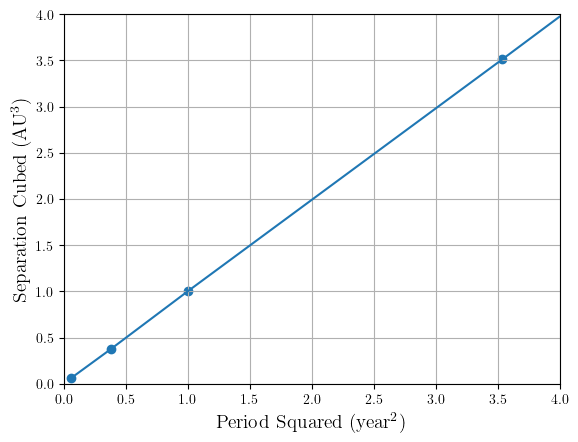

In [ ]:
# Solution!

period_squared = period*period
separation_cubed = separation*separation*separation

plt.plot(period_squared, separation_cubed)
plt.scatter(period_squared, separation_cubed)

plt.xlim([0, 4])
plt.ylim([0, 4])


plt.ylabel('Separation Cubed (AU$^3$)', fontsize=14)
plt.xlabel('Period Squared (year$^2$)', fontsize=14)
plt.grid()

10. **Now we will use the same function that we used in the notebook "Introduction to basic programming and plotting" to find the slope of the line. Rememeber that we are fitting the equation  $y=mx+b$ and finding the best-fit values for the slope ($m$) and intercept ($b$). The function we will use is ```scipy.stats.linregress```, feel free to look back at the other notebook(s) to remember how to use this function. In the cell below use this function to fit a line to the points we plotted above and print out the slope of the line.**

In [ ]:
# Solution!

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(separation_cubed, period_squared)
print(slope)

0.9828108439040203


11. **Let's check if the fit looks good compared to our data points by plotting the best-fit line over the points. Copy the code from exercise 8 below and add a line defined by $y=mx+b$ where $m$ and $b$ are given by the fit. You can reference the "Introduction to programming" notebook for this if you'd like.**

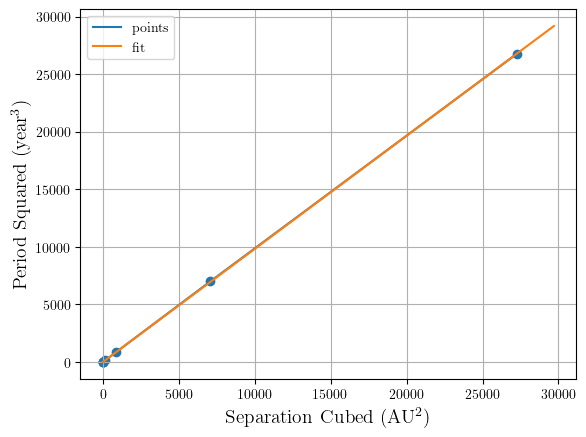

In [ ]:
# Solution!

x_fit = np.arange(100)*300
y_fit = slope*x_fit + intercept

plt.plot(separation_cubed, period_squared, label='points')
plt.scatter(separation_cubed, period_squared)

plt.plot(x_fit, y_fit, label='fit') # this commmand plots a line that shows the best fit to our points

plt.xlabel('Separation Cubed (AU$^2$)', fontsize=14)
plt.ylabel('Period Squared (year$^3$)', fontsize=14)
plt.grid()
plt.legend()

12. **According to the equations above and your answer to exercise 6, the slope of the line above is equal to:**

$ m = 0.5 \left( \frac{M}{\mathrm{octillion \,\,ton}}\right)$.

**Solve the equation above for $M$. Then plug in the result of the fit for $m$ and find the mass of the sun in octillion tons.**

In [ ]:
# Solution!

mass_of_sun = slope*2. # this is in units of octillion ton
print('mass of the sun is: ', mass_of_sun, 'octillion tons')

mass of the sun is:  1.9656216878080406 octillion tons


13. **According to a quick google search, the mass of the sun is about 2 octillion tons. How close is your measurement to the actual value?**

## Congratulations!! You have just used real astronomical data to measure the mass of the sun! This is how the sun's mass was originally measured.

# Additional Exercise

In this exercise we will learn about for loops and use a for loop to find the value of $\pi$ numerically. The basic concept is that we will randomly "thrown darts" at a square (generate random numbers within a square), and the percentage of the darts that fall within a distance $r$ of the center, will be equal to the percentage of the area of the square that is filled by a circle with radius $r$. Using the equation for the area of a circle we can solve for $\pi$.

###Step 1: Example with for loops

In the cell below you will see an example of a ```for``` loop that will simply print the numbers 0-9. The for loop is a simple way for you to make the computer do something several times, without having to give the commands multiple times. ```for``` loops are incredibly useful for coding and one of the most important coding concepts.

In [ ]:
for i in range(0,10): # this command starts the for loop. The loop will iterate from 0 to 9, and in each of the iterations the value of i will change
  print(i) # here we will print the value of i so that you can see it change

0
1
2
3
4
5
6
7
8
9


###Step 2: Generating random numbers

Another important concept in programming is a random number. Making a computer generate a random number is actually incredibly useful, but also incredibly hard. In the example below I import a new library called ```random``` and use the function ```random.random``` to generate a single random number between 0 and 1.

In [ ]:
import random # this loads in the library that generates random numbers
num = random.random() # this will generate a single random number between 0 and 1
print(num) # here we print out the random number we generated.

0.972819201769355


Re-run the cell above a few times to see the different random numbers it will generate.

###Step 3: Plotting random points in 2D

We will now use the function we learned above to generate a series of random points that we can plot in 2D.

**You will first need to create a for loop from 0 to 200.**

**Then, at each iteration of the for loop, generate a random number for $x$ and another random number for $y$. Then plot the $x-y$ point. You will want to use the function ```plt.scatter()``` for plotting.**

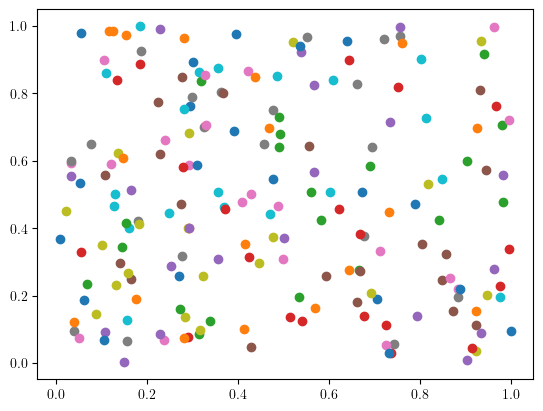

In [ ]:
# Solution!

for i in range(0,200):
  plt.scatter(random.random(), random.random())

In the plot you generated above you should see points distributed randomly between 0 and 1 in the x and y directions. The next steps are a little simpler if we shift our random numbers so that the square of random numbers we generate is centered on (0,0). It becomes even easier if we make the square bigger, so that it goes from -1 to 1 in both $x$ and $y$. To do this, we will first multiply all of our random numbers by 2. This will generate a new square that goes from 0 to 2 in both directions. **Copy your answer from above, but multiply both the $x$ value and the $y$ value by 2.**

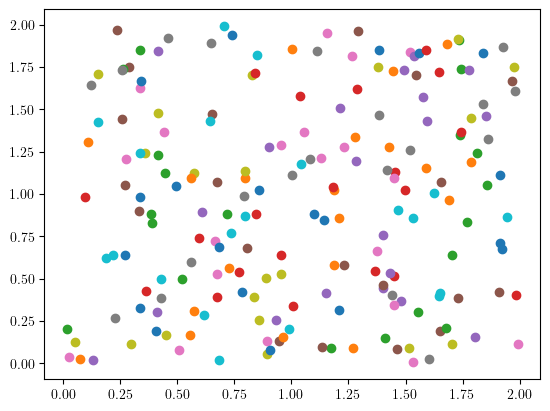

In [ ]:
# Solution!

for i in range(0,200):
  plt.scatter(random.random()*2, random.random()*2)

**We will now subtract 1 from both the x and y random numbers so that we shift them over by 1 in both directions. This will result in a centered square of random numbers between -1 and 1 in both directions. Make sure that you subtract 1 *after* you multiply by 2.**

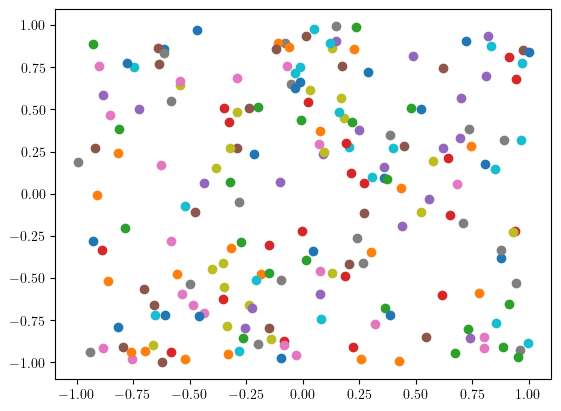

In [ ]:
# Solution!

for i in range(0,200):
  plt.scatter(random.random()*2-1, random.random()*2-1)

### Step 4: Area of a circle

We will use the equation for the area of a circle, and solve for $\pi$,

$\mathrm{area\,of\,circle} = \pi r^2$.

The area of the square that contains all of our random numbers above is 4 since it has a length of 2 on each side. If we were to draw a circle  that is centered on 0,0 with a radius of 1 it would almost fill in the square above, except for the edges.

The code below will draw a filled in circle with radius equal to 1 centered at (0, 0). **Copy the code above into the bottom of the cell below so that we add the random numbers we've generated to the plot.**


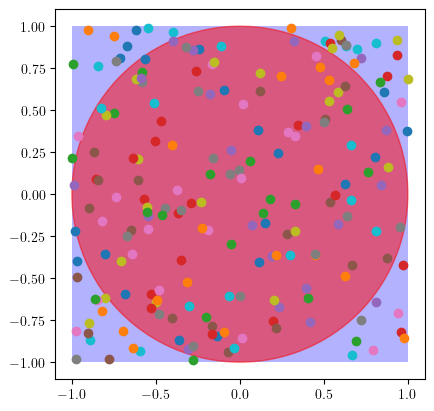

In [ ]:
# the lines of code below color in the square so we can see it visually
from matplotlib.patches import Rectangle
someX, someY = -1, -1
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 2,2, facecolor="blue", alpha=.3))

# The lines of code below generate a circle centered at (0, 0), with radius=1, and plots it
circle = plt.Circle((0, 0), 1, color='r', alpha=.5)
plt.gca().add_patch(circle)

# Here we set the axis limits, and force the aspect ratio to be equal so the circle is circular.
plt.gca().set_aspect('equal')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])




# Solution!
for i in range(0,200):
  plt.scatter(random.random()*2-1, random.random()*2-1)


The ratio of the area of the circle to the area of the square is equal to

$\frac{\mathrm{area\,circle}}{\mathrm{area\,square}} = \frac{\pi}{4}$

where we have set the radius to 1. If we can find the ratio of areas of the two shapes, all we have to do is multiply that ratio by 4 and we will have an estimate for $\pi$.

###Step 5: If statement example
We can count how many random numbers fall within the circle, by measuring the distance of that point from the center of the circle. To do this, we will need to learn another really important programming concept, the ```if``` statement.

You can see an example of an ```if``` statement below. **Change the value of x and re-run the cell. Do you understand what the if statement is doing?**


In [ ]:
x=4

if x < 5: # this is the syntax of an if statement. If x is less than five the computer will run the lines of code that are indented below it
  print('x is smaller than 5')
else: # if x is not less than five, then the computer will execute the line of code indented below the else statement
  print('x is not smaller than 5')

x is smaller than 5


### Step 6: Putting it all together

We will execute a ```for``` loop again, but this time we will ask whether the distance from the center is less than or greater than 1. We will count how many times it is less than 1.

The distance formula is

$\mathrm{distance} = \sqrt{x^2 + y^2}$.

**To start you can set a variable called ```counter``` to zero. Then copy the ```for``` loop that generates your random numbers from above. Then, inside the for loop, use the distance formula above to find the distance of the new random point from the center. Inside of the for loop add a new ```if``` statement that asks whether the disntace is less than one. If the distance is less than one, then increase ```counter``` by one.**

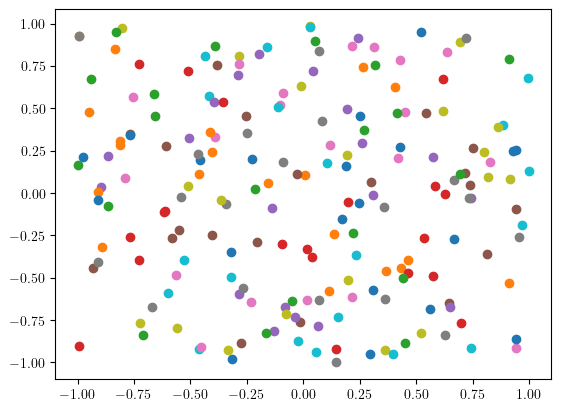

In [ ]:
# Solution!

counter=0
for i in range(0,200):
  x = random.random()*2-1
  y = random.random()*2-1
  plt.scatter(x, y)

  distance = np.sqrt(x*x + y*y)
  if distance < 1:
    counter=counter+1




**Print the ratio of ```counter``` over the total number of random numbers you generated above. Also print this ratio multiplied by 4. Is this last number close to the value of $\pi$?**

You can run the cell above and the cell below a few times to see if you get close to $\pi$ on average.

In [ ]:
# Solution!
print(counter/200.)
print(counter/200.*4.)

0.845
3.38


In the above we only used 200 random numbers, so there is a significant error in this measurement. If we use a much larger number of random numbers we will get much closer to the real value of $\pi$. However, if we want to use a larger number we should **not** plot the points, because that will take a long time.

In the cell below, redo the exercise above, but use 10,000 random points and don't plot anything. Do you get a better value for $\pi$? How about if you use 1,000,000? 10,000,000?

In [ ]:
# Solution!

counter=0
for i in range(0,10000000):
  x = random.random()*2-1
  y = random.random()*2-1

  distance = np.sqrt(x*x + y*y)
  if distance < 1:
    counter=counter+1

print(counter/1000000000.)
print(counter/1000000000.*4.)

0.007851724
0.031406896
